**Analyzing patient data for heart disease detection**

In [2]:
import pandas as pd #to work with DataFrames
import matplotlib.pyplot as plt #to create charts
import seaborn as sns #to create complex graphs
import plotly.express as px #to create interactive charts 

**Objective**

* To visualise the distribution of people with heart disease with respect to their age, gender 
* To use different machine learning models to predict whether a patient will have a heart disease

**Importing the dataset**

In [25]:
data1 = pd.read_csv('D:\\User Data\\Desktop\\FAX\\7 semestar\\VNP\\auditoriski\\heart.csv')

In [169]:
podatoci = pd.read_csv('D:/User Data/Desktop/FAX/7 semestar/VNP/auditoriski/heart.csv')

**Calculating main statistical metrics for each numerical variables**

* **count** number of non-null entries in each column
* **mean** average value of each column
* **standard deviation** measures the spread of data around the mean

In [171]:
podatoci.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Calculating a single statistical metric**

In [173]:
podatoci.age.quantile(0.5)

56.0

**1. Histogram - used only for numerical values**

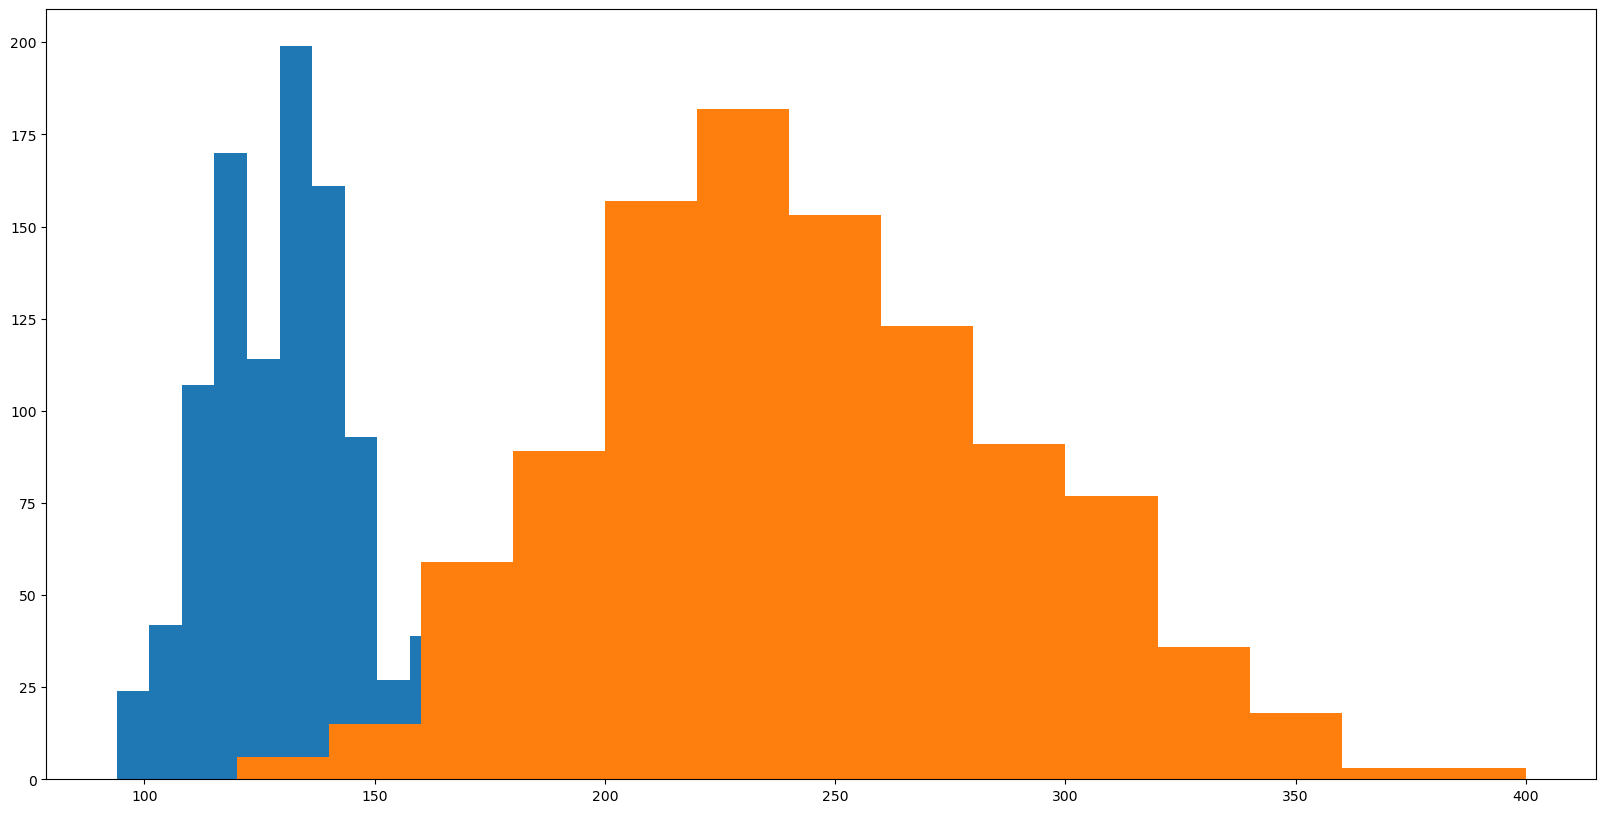

In [175]:
plt.figure(figsize=(20, 10)) #defines the width and height of histogram
plt.hist(podatoci['trestbps'], bins=15) #bins specifies the number of bars
plt.hist(podatoci['chol'], bins=15, range=(100, 400))
plt.show()

**Seaborn Distribution PLot**

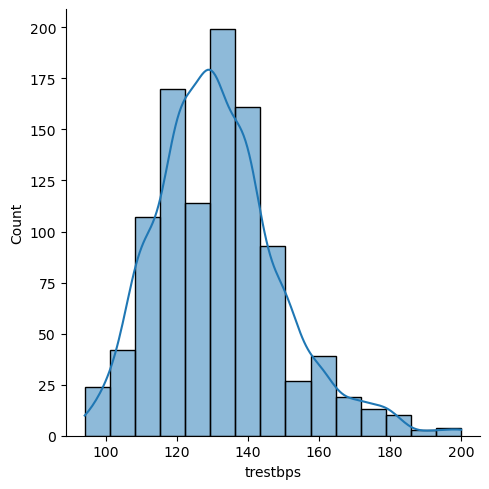

In [186]:
sns.displot(podatoci['trestbps'], kde=True, bins=15) #kde draws probability distribution over histogram when set to true
plt.show()

**2. Bar Plot**

In [234]:
podatoci[['cp']]

,cp
0,0
1,0
2,0
3,0
4,0
...,...
1020,1
1021,0
1022,0
1023,0


In [193]:
podatoci[['cp', 'age']]

,cp,age
0,0,52
1,0,53
2,0,70
3,0,61
4,0,62
...,...,...
1020,1,59
1021,0,60
1022,0,47
1023,0,50


In [227]:
cpAgeMean = podatoci.groupby('cp')['age'].mean() 

this will group the values by cp and calculate the average age per chest pain type

In [240]:
cpAgeMean

cp
0    55.784708
1    51.245509
2    53.517606
3    56.012987
Name: age, dtype: float64

In [229]:
cpCounts = podatoci.groupby('cp').size()

this will group the values by cp and count how many of each type od cp

In [232]:
cpCounts

cp
0    497
1    167
2    284
3     77
dtype: int64

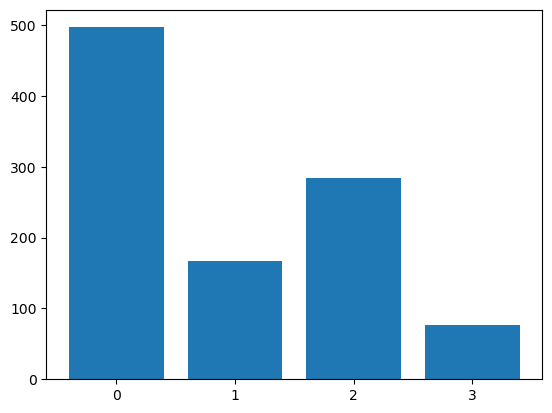

In [243]:
plt.bar(cpCounts.index.astype(str), cpCounts)
plt.show()

plt.bar() converts the index of cpCounts to strings, which are used as labels on the x-axis. Then, for the y-axis it uses the values of cpCounts for each cp type.

**Drawing the same bar plot with pandas**

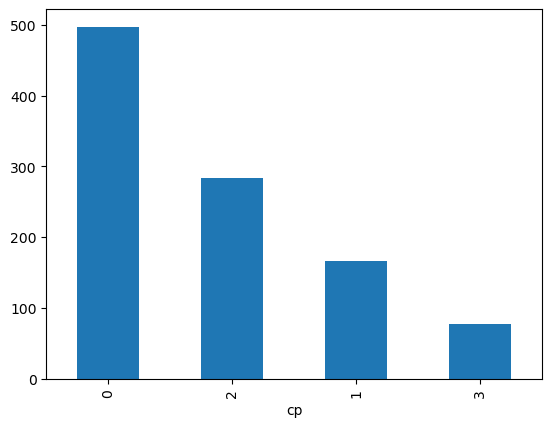

In [248]:
podatoci.cp.value_counts().plot.bar()
plt.show()

**3.Box Plot**

Used for visualizing quantiles and IQR of the distributions. Outliers are represented as circles. This type of graph can only be used for categorical and continuous variables.

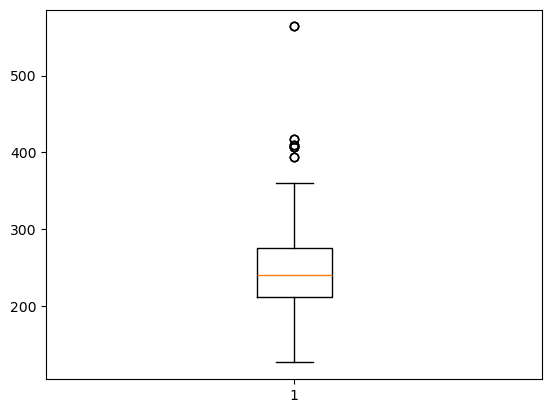

In [257]:
plt.boxplot(podatoci['chol'])
plt.show()

In [260]:
podatoci['cp']=podatoci['cp'].astype(str)

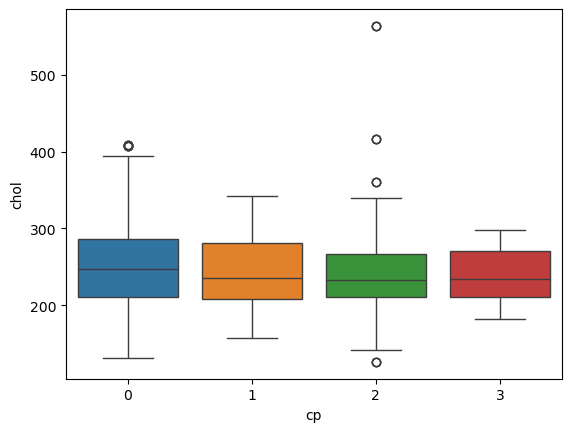

In [266]:
sns.boxplot(data=podatoci, x='cp', y='chol', hue='cp')
plt.show()

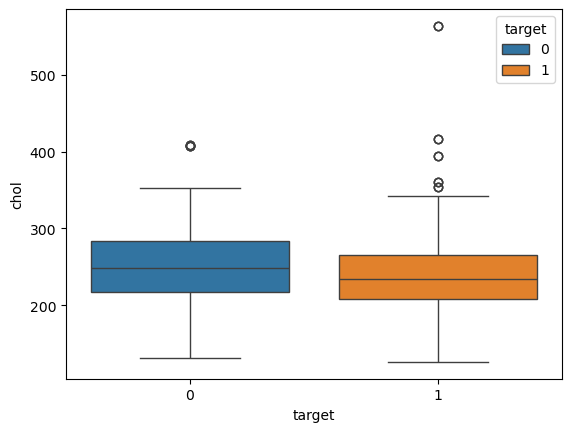

In [268]:
sns.boxplot(data = podatoci, x='target', y='chol', hue='target')
plt.show()

**4. Line PLot**

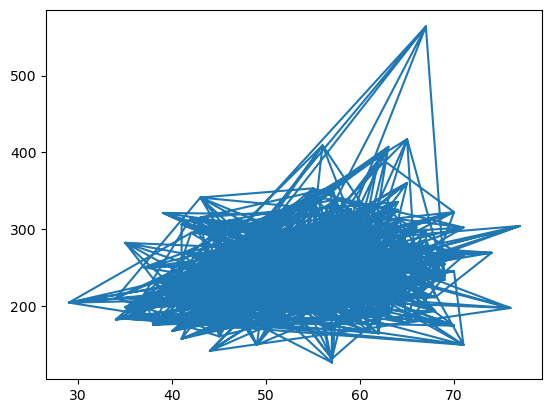

In [277]:
plt.plot(podatoci['age'], data['chol']) #adds a new point for each row and connects them

In [279]:
podatoci = podatoci.sort_values('age')

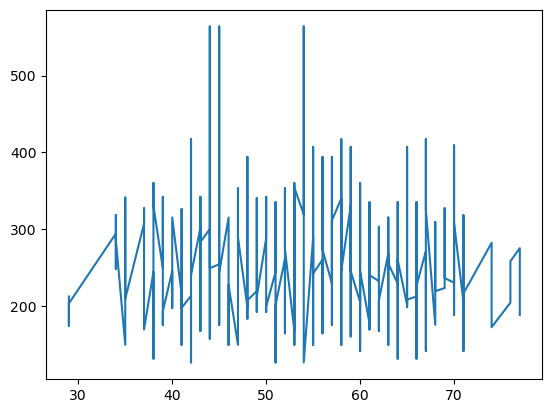

In [281]:
plt.plot(podatoci['age'], data['chol'])

Since we have multiple points for some values of age, we need to group by age and calculate the mean

In [290]:
groupByChol = podatoci.groupby('age')[['chol']].mean()

In [300]:
groupByChol

,chol
age,
29,204.000000
34,196.000000
35,209.200000
37,232.500000
38,193.666667
39,236.857143
40,196.090909
41,218.156250
42,246.807692


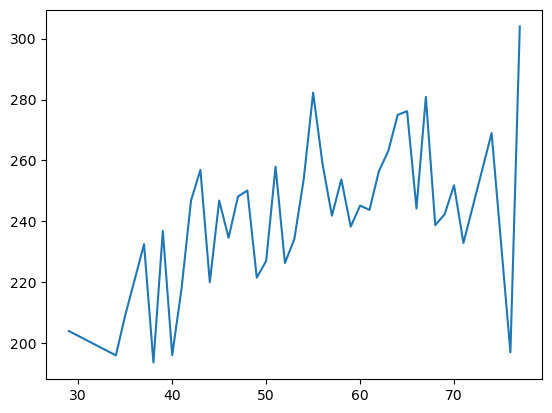

In [298]:
plt.plot(groupByChol)
plt.show()

**5. Scatter PLot**

Used for visualizing dependencies between непрекинати variables. We can see linear and non-linear correlations

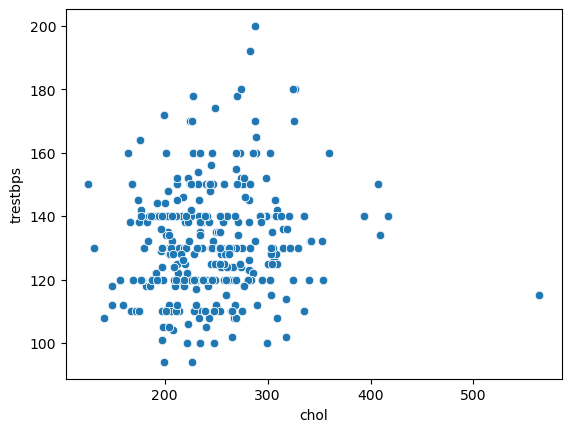

In [307]:
sns.scatterplot(data=podatoci, x='chol', y='trestbps')
plt.show()

**Correlation Matrix**

We should use the correlation matrix only with continuous variables, since it calculates the Pearson Correlation Coefficient

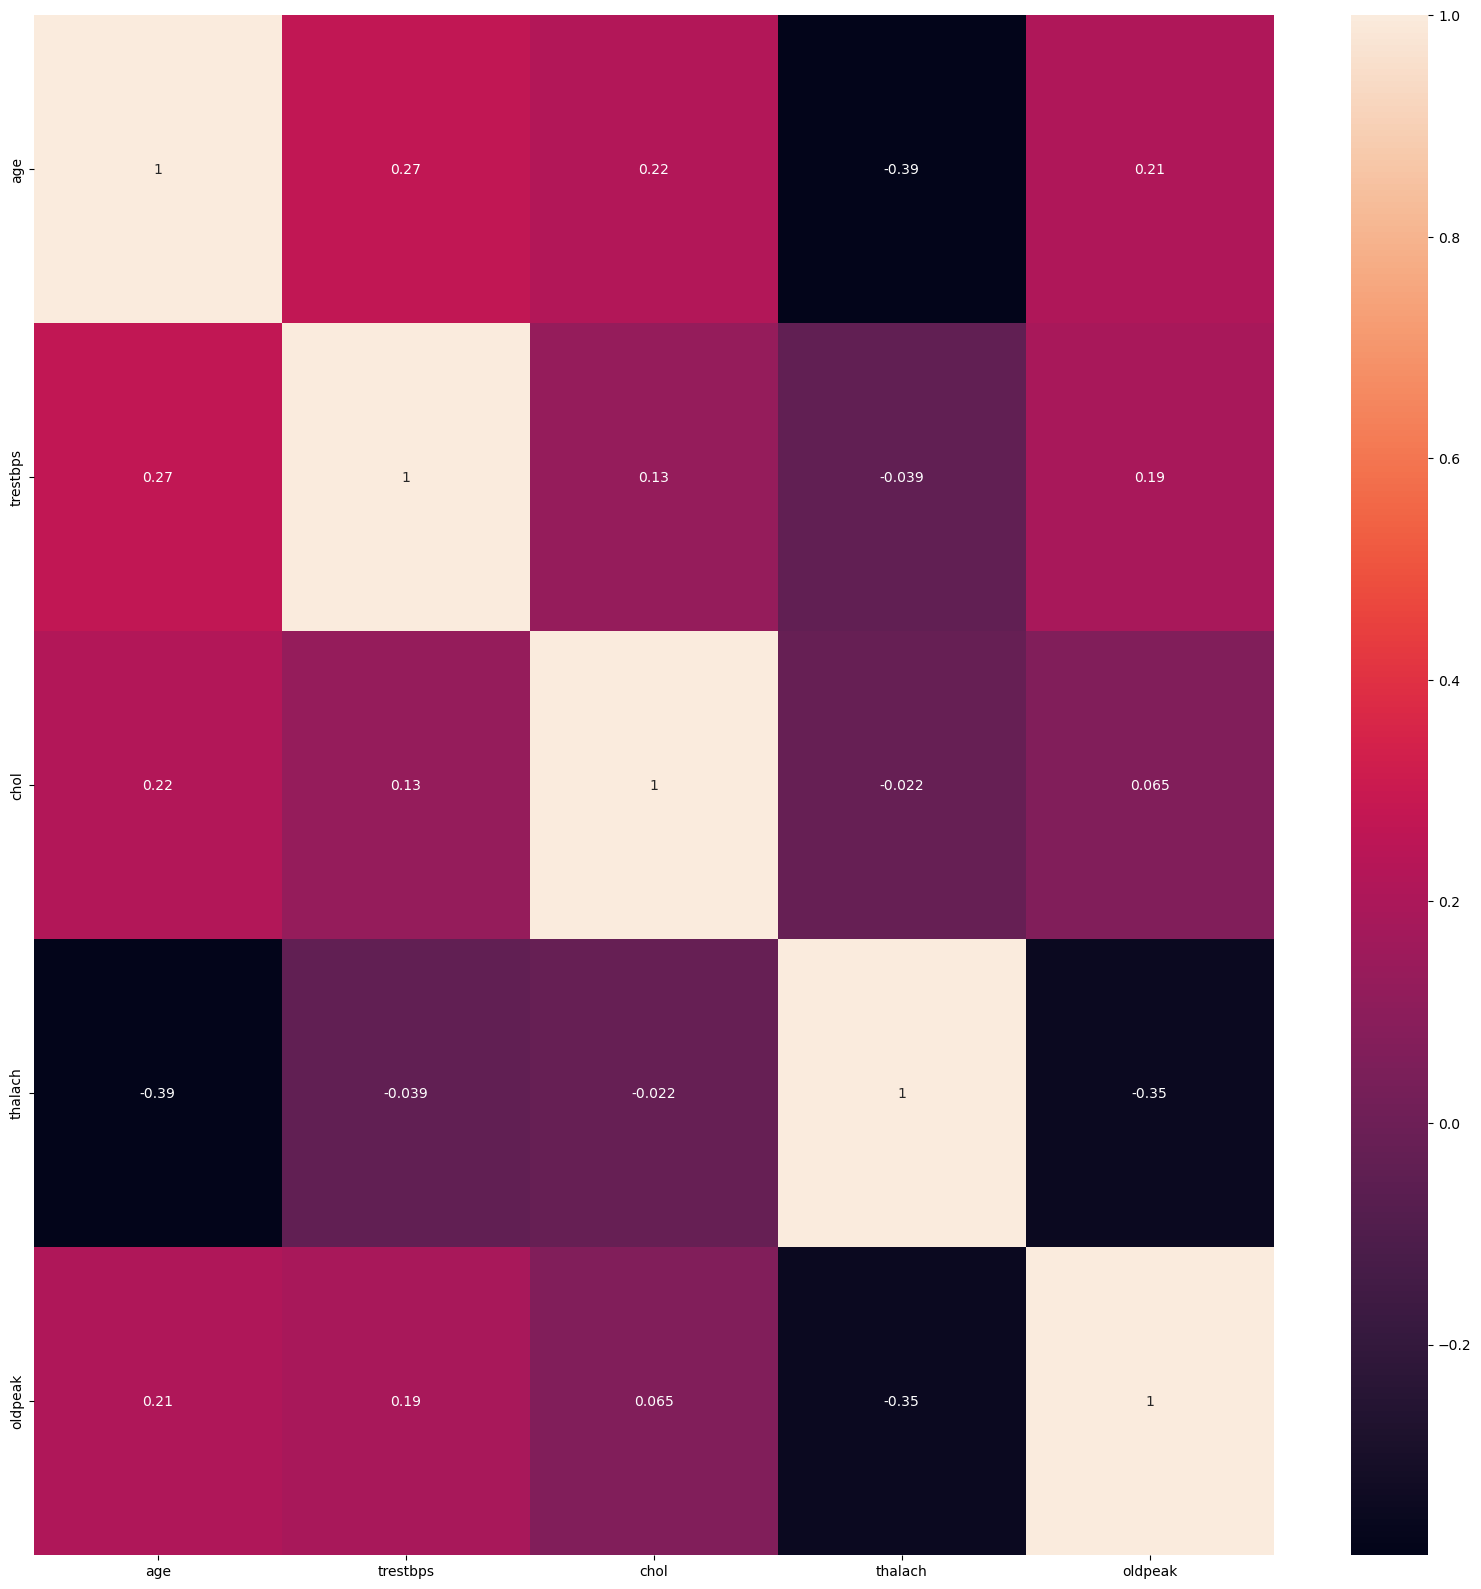

In [315]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.drop(columns=['sex', 'cp', 'target', 'fbs', 'slope', 'restecg', 'exang', 'ca', 'thal']).corr(), annot=True)  # data.corr() returns the correlation between each pair of variables
plt.show()

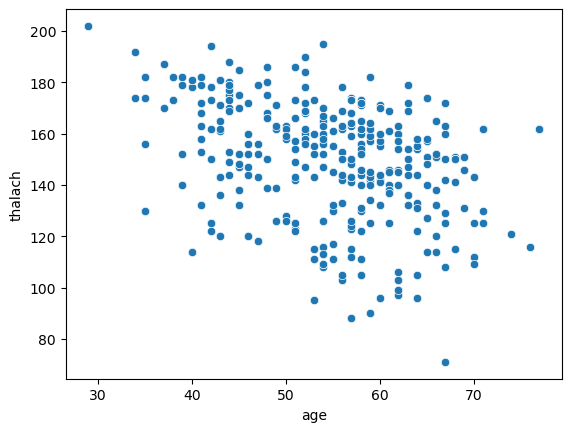

In [317]:
sns.scatterplot(data= podatoci, x='age', y='thalach')
plt.show()

In order to get age ranges instead of age values, we are going to bin the age variable 

In [332]:
podatoci['ageGroups'] = data['age'] // 10*10

In [334]:
podatoci

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,ageGroups
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,20
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,20
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,20
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,20
572,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,70
965,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,70
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0,70
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0,70


In [352]:
grupirani = podatoci.groupby(['ageGroups', 'cp'])[['chol']].mean().reset_index()

This line groupd the podatoci DataFrame by its columns ['ageGroups'] and ['cp']. Then it calculates the mean of the ['chol'] column for each combination of ageGroups and cp. Lastly, the result is reset to a standard index.

In [354]:
grupirani

,ageGroups,cp,chol
0,20,1,204.000000
1,30,0,216.400000
2,30,1,199.714286
3,30,2,218.125000
4,30,3,210.000000
5,40,0,245.542553
6,40,1,230.403226
7,40,2,225.291667
8,40,3,235.666667
9,50,0,252.923810


**6. Area Plot**

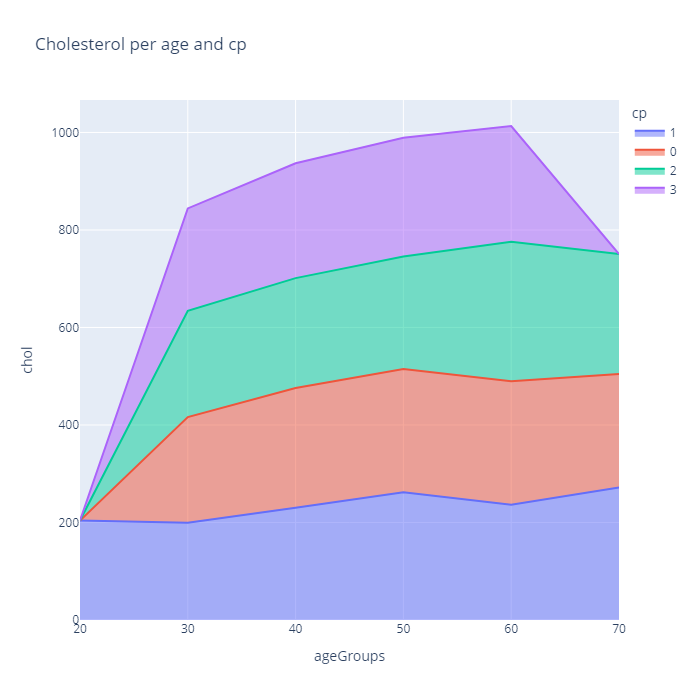

In [358]:
px.area(
    grupirani,
    x='ageGroups',
    y='chol',
    color = 'cp',
    title = 'Cholesterol per age and cp',
    width = 800,
    height = 700
)

**7.Bar Charts with Multiple Categories**

In [408]:
grupa = podatoci.groupby(['sex','cp']).size()

The .size() function generates a new column which we will later relabel as 'count'

In [410]:
grupa

sex  cp
0    0     133
     1      57
     2     109
     3      13
1    0     364
     1     110
     2     175
     3      64
dtype: int64

In [375]:
groupBySexAndCp = podatoci.groupby(['sex','cp']).size().reset_index()

This line groups the data by sex and cp, counts the occurances of each combination and resets the index to make it a standard DataFrame

In [377]:
groupBySexAndCp

,sex,cp,0
0,0,0,133
1,0,1,57
2,0,2,109
3,0,3,13
4,1,0,364
5,1,1,110
6,1,2,175
7,1,3,64


In [379]:
groupBySexAndCp = groupBySexAndCp.rename(columns={0:'count'})

This line renames the column name from 0 to count, which was automatically labeled as that from the line abouve. We give it the name 'count' since it counts the number of cp types per sex.

In [381]:
groupBySexAndCp

,sex,cp,count
0,0,0,133
1,0,1,57
2,0,2,109
3,0,3,13
4,1,0,364
5,1,1,110
6,1,2,175
7,1,3,64


**---**

In [416]:
fig = px.bar (
    groupBySexAndCp,
    x='sex',
    y='count',
    color = 'cp',
    barmode = 'group',
    orientation = 'v',
    title = 'Cp type per sex',
    width = 800,
    height = 700,
)

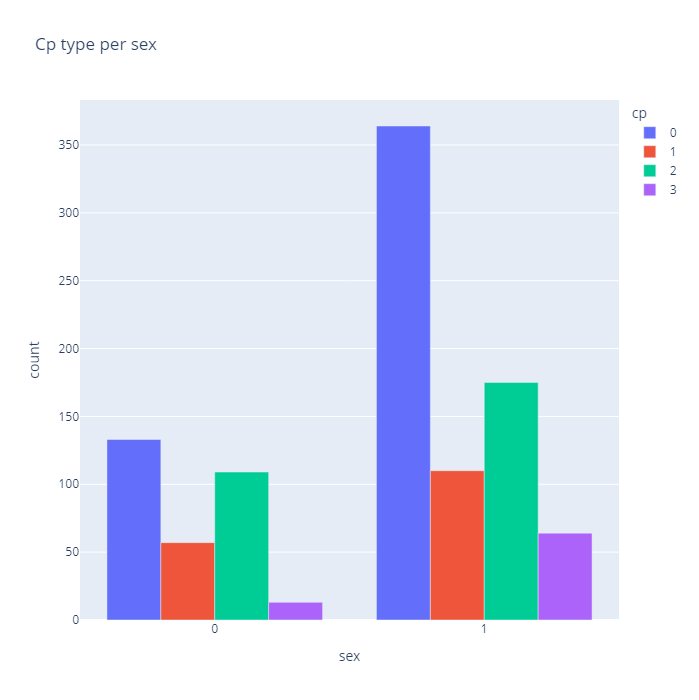

In [418]:
fig.show()

In [424]:
gr1 = podatoci.groupby(['ageGroups', 'cp']).size().reset_index()
gr1 = gr1.rename(columns={0: 'count'})
gr1 = gr1.sort_values(['ageGroups', 'cp'])
gr1['cp'] = gr1['cp'].astype(int)  # transform to int to get sorted values in plot
gr1['ageGroups'] = gr1['ageGroups'].astype(str)

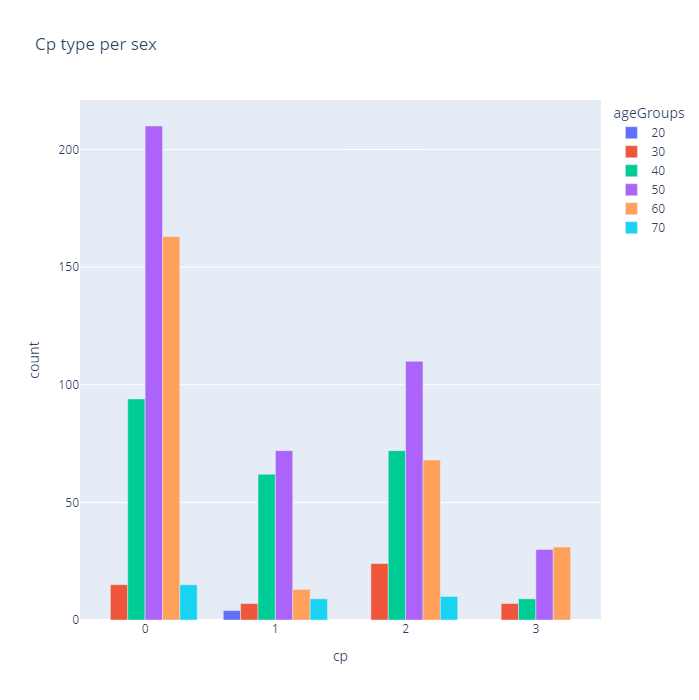

In [426]:
fig = px.bar(
    gr1,
    x='cp',
    y="count",
    color = 'ageGroups',
    barmode='group',
    orientation='v',
    title='Cp type per sex',
    width=800,
    height=700
)
fig.show()